In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [373]:
data=pd.read_csv('international_matches.csv')
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
data.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

## TOP 10 FIFA RANKING

In [376]:
fifa_rank=data[['date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home=fifa_rank[['date', 'home_team','home_team_fifa_rank']].rename(columns={'home_team':'team','home_team_fifa_rank':'rank'})
away=fifa_rank[['date', 'away_team','away_team_fifa_rank']].rename(columns={'away_team':'team','away_team_fifa_rank':'rank'})
fifa_rank=pd.concat([home,away])
fifa_rank.head()

,date,team,rank
0,1993-08-08,Bolivia,59
1,1993-08-08,Brazil,8
2,1993-08-08,Ecuador,35
3,1993-08-08,Guinea,65
4,1993-08-08,Paraguay,67


In [377]:
fifa_rank=fifa_rank.sort_values(['date','team'],ascending=[False,True])
fifa_rank.head()
last_rank=fifa_rank
fifa_rank_top_10=fifa_rank.groupby('team').first().sort_values(['rank'], ascending=True)[0:10].reset_index()
fifa_rank_top_10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


Text(0.5, 1.0, 'Top 10 FIFA ranking teams')

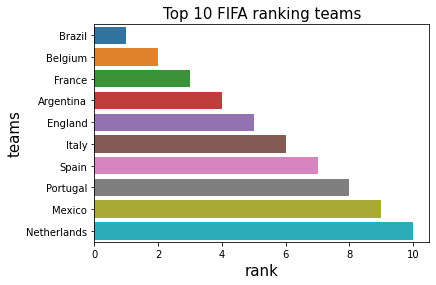

In [378]:
sns.barplot(x='rank', y='team', data=fifa_rank_top_10)
plt.xlabel('rank',size=15)
plt.ylabel('teams',size=15)
plt.title('Top 10 FIFA ranking teams', size=15)

## Last 10 FIFA Ranking Teams

In [379]:
last_rank_10=last_rank.groupby('team').first().sort_values(['rank'], ascending=False).head(10).reset_index()
last_rank_10

,team,date,rank
0,San Marino,2022-06-12,211
1,Anguilla,2022-06-12,210
2,British Virgin Islands,2022-06-12,209
3,US Virgin Islands,2022-06-06,208
4,Turks and Caicos Islands,2022-06-06,206
5,Sri Lanka,2022-06-14,205
6,Gibraltar,2022-06-12,203
7,Guam,2021-10-12,203
8,Tonga,2019-07-18,202
9,Eritrea,2019-09-10,202


Text(0.5, 1.0, 'Last 10 FIFA ranking teams')

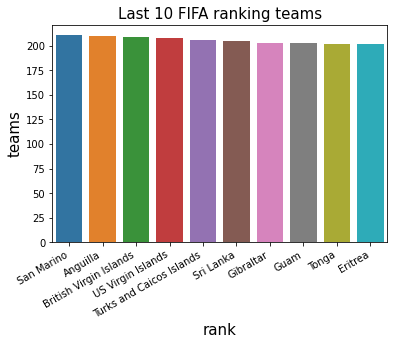

In [380]:
sns.barplot(y='rank', x='team', data=last_rank_10)
plt.xlabel('rank',size=15)
plt.xticks(rotation=30, horizontalalignment='right')
plt.ylabel('teams',size=15)
plt.title('Last 10 FIFA ranking teams', size=15)

## Top 10 team with highest winning percentage rate

In [381]:
def home_percentage(team):
    score=len(data[(data['home_team']==team) & (data['home_team_result']=='Win')]) /len(data[data['home_team']==team ])*100
    return round(score)
def away_percentage(team):
    score=len(data[(data['away_team']==team) & (data['home_team_result']=='Lose')]) /len(data[data['away_team']==team ])*100
    return round(score)

In [382]:
fifa_rank_top_10['home_win_rate']=np.vectorize(home_percentage)(fifa_rank_top_10['team'])
fifa_rank_top_10['away_win_rate']=np.vectorize(away_percentage)(fifa_rank_top_10['team'])
fifa_rank_top_10['average_win_rate']=round((fifa_rank_top_10['home_win_rate']+fifa_rank_top_10['away_win_rate'])/2)
fifa_rank_winner=fifa_rank_top_10.sort_values('average_win_rate', ascending=False)
fifa_rank_winner

,team,date,rank,home_win_rate,away_win_rate,average_win_rate
0,Brazil,2022-06-06,1,78,60,69.0
6,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
7,Portugal,2022-06-12,8,67,49,58.0
9,Netherlands,2022-06-14,10,62,55,58.0
5,Italy,2022-06-14,6,60,49,54.0
1,Belgium,2022-06-14,2,60,46,53.0
8,Mexico,2022-06-14,9,60,41,50.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Argentina'),
  Text(4, 0, 'England'),
  Text(5, 0, 'Portugal'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Mexico')])

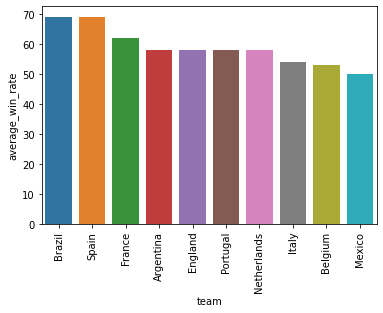

In [383]:
sns.barplot(x='team', y='average_win_rate', data=fifa_rank_winner)
plt.xticks(rotation=90)

In [384]:
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Top 10 attacking teams 

In [385]:
fifa_attack=data[['date','home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home=fifa_attack[['date', 'home_team','home_team_mean_offense_score']].rename(columns={'home_team':'team','home_team_mean_offense_score':'offense'})
away=fifa_attack[['date', 'away_team','away_team_mean_offense_score']].rename(columns={'away_team':'team','away_team_mean_offense_score':'offense'})
fifa_offense=pd.concat([home,away])
fifa_offense=fifa_offense.sort_values(['date', 'team'], ascending=[False, True])
fifa_offense_last=fifa_offense
fifa_offense_top_10=fifa_offense.groupby('team').first().sort_values(['offense'], ascending=False)[0:10].reset_index()
fifa_offense_top_10

,team,date,offense
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


Text(0.5, 1.0, 'Top 10 attacking teams')

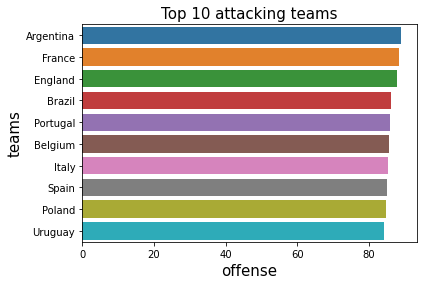

In [386]:
sns.barplot(x='offense', y='team', data=fifa_offense_top_10)
plt.xlabel('offense',size=15)
plt.ylabel('teams',size=15)
plt.title('Top 10 attacking teams', size=15)

## Top 10 defending teams

In [387]:
fifa_defend=data[['date','home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home=fifa_defend[['date', 'home_team','home_team_mean_defense_score']].rename(columns={'home_team':'team','home_team_mean_defense_score':'defense'})
away=fifa_defend[['date', 'away_team','away_team_mean_defense_score']].rename(columns={'away_team':'team','away_team_mean_defense_score':'defense'})
fifa_defense=pd.concat([home,away])
fifa_defense=fifa_defense.sort_values(['date','team'], ascending=[False,True])
fifa_defense_last=fifa_defense
fifa_defense_top_10=fifa_defense.groupby('team').first().sort_values(['defense'], ascending=False).reset_index()[0:10]
fifa_defense_top_10

,team,date,defense
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


Text(0.5, 1.0, 'Top 10 defending teams')

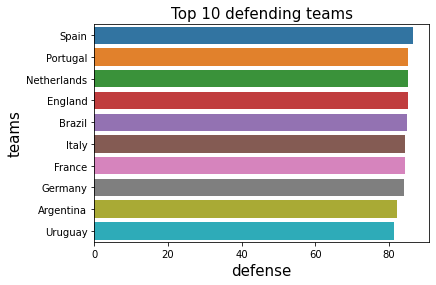

In [388]:
sns.barplot(x='defense', y='team', data=fifa_defense_top_10)
plt.xlabel('defense',size=15)
plt.ylabel('teams',size=15)
plt.title('Top 10 defending teams', size=15)

## Top 10 midfielder teams

In [389]:
fifa_midfield=data[['date','home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home=fifa_midfield[['date', 'home_team','home_team_mean_midfield_score']].rename(columns={'home_team':'team','home_team_mean_midfield_score':'midfield'})
away=fifa_midfield[['date', 'away_team','away_team_mean_midfield_score']].rename(columns={'away_team':'team','away_team_mean_midfield_score':'midfield'})
fifa_midfield=pd.concat([home,away])
fifa_midfield=fifa_midfield.sort_values(['date','team'], ascending=[False,True])
fifa_midfield_last=fifa_midfield
fifa_midfield_top_10=fifa_midfield.groupby('team').first().sort_values(['midfield'], ascending=False).reset_index()[0:10]
fifa_midfield_top_10

,team,date,midfield
0,Germany,2022-06-14,87.8
1,France,2022-06-13,86.8
2,Spain,2022-06-12,86.0
3,Belgium,2022-06-14,85.5
4,Brazil,2022-06-06,85.5
5,Portugal,2022-06-12,84.5
6,Italy,2022-06-14,84.5
7,Croatia,2022-06-13,84.2
8,England,2022-06-14,84.0
9,Argentina,2022-06-05,84.0


Text(0.5, 1.0, 'Top 10 midfielding teams')

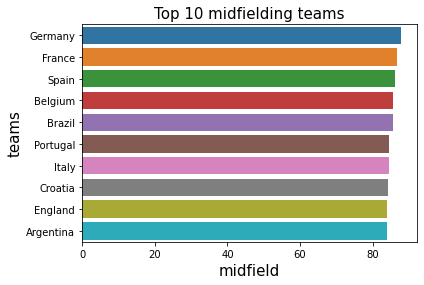

In [390]:
sns.barplot(x='midfield', y='team', data=fifa_midfield_top_10)
plt.xlabel('midfield',size=15)
plt.ylabel('teams',size=15)
plt.title('Top 10 midfielding teams', size=15)

## Top 10 goalkeeping teams

In [391]:
fifa_goalkeeping=data[['date','home_team', 'away_team', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score']]
home=fifa_goalkeeping[['date', 'home_team','home_team_goalkeeper_score']].rename(columns={'home_team':'team','home_team_goalkeeper_score':'goalkeeping'})
away=fifa_goalkeeping[['date', 'away_team','away_team_goalkeeper_score']].rename(columns={'away_team':'team','away_team_goalkeeper_score':'goalkeeping'})
fifa_goalkeeping=pd.concat([home,away])
fifa_goalkeeping=fifa_goalkeeping.sort_values(['date','team'], ascending=[False,True])
fifa_goalkeeping_last=fifa_goalkeeping
fifa_goalkeeping_top_10=fifa_goalkeeping.groupby('team').first().sort_values(['goalkeeping'], ascending=False).reset_index()[0:10]
fifa_goalkeeping_top_10

,team,date,goalkeeping
0,Slovenia,2022-06-12,91.0
1,Germany,2022-06-14,90.0
2,Italy,2022-06-14,89.0
3,Belgium,2022-06-14,89.0
4,Brazil,2022-06-06,89.0
5,Costa Rica,2022-06-14,88.0
6,France,2022-06-13,87.0
7,Poland,2022-06-14,87.0
8,Switzerland,2022-06-12,85.0
9,Hungary,2022-06-14,85.0


Text(0.5, 1.0, 'Top 10 goalkeeping teams')

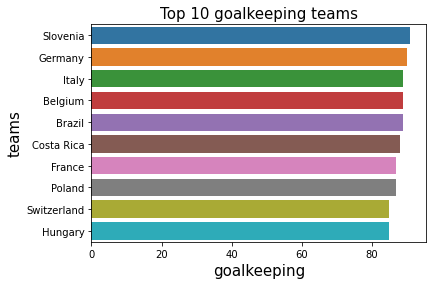

In [392]:
sns.barplot(x='goalkeeping', y='team', data=fifa_goalkeeping_top_10)
plt.xlabel('goalkeeping',size=15)
plt.ylabel('teams',size=15)
plt.title('Top 10 goalkeeping teams', size=15)

In [393]:
data['Location']=data['country']+','+data['city']

In [394]:
data.drop(['city','country'], axis=1, inplace=True)

In [395]:
data['Match_Location']=data['Location']
data.drop(['Location'], axis=1, inplace=True)

In [396]:
data.drop('tournament', axis=1, inplace=True)

## Home Team Advantage

Text(0.5, 1.0, 'Home team advantage')

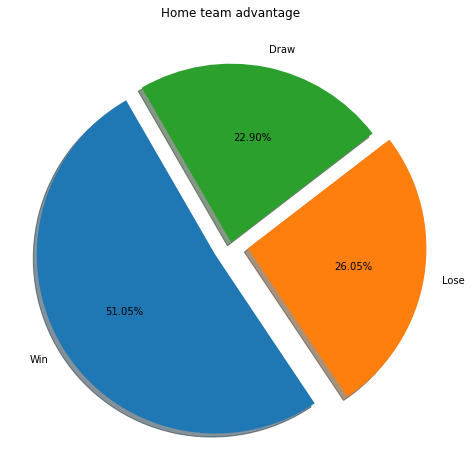

In [397]:
home_team_advantage=data[data['neutral_location']==False]['home_team_result'].value_counts(normalize=True)
plt.figure(figsize=(8,10))
plt.pie(home_team_advantage, labels=['Win','Lose', 'Draw'], autopct='%.02f%%',shadow=True, explode=(.099,.099,.019),startangle=120)
plt.title('Home team advantage')

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  neutral_location               23921 non-null  bool   
 12  shoot_out                      23921 non-null 

In [399]:
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,Match_Location
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bolivia,La Paz"
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Brazil,Maceió"
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ecuador,Quito"
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Guinea,Conakry"
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Paraguay,Asunción"


## Handling Missing Values

In [400]:
data['home_team_goalkeeper_score']=data['home_team_goalkeeper_score'].fillna(data['home_team_goalkeeper_score'].median())
data['away_team_goalkeeper_score']=data['away_team_goalkeeper_score'].fillna(data['away_team_goalkeeper_score'].median())
data['home_team_mean_defense_score']=data['home_team_mean_defense_score'].fillna(data['home_team_mean_defense_score'].median())
data['home_team_mean_offense_score']=data['home_team_mean_offense_score'].fillna(data['home_team_mean_offense_score'].median())
data['home_team_mean_midfield_score']=data['home_team_mean_midfield_score'].fillna(data['home_team_mean_midfield_score'].median())
data['away_team_mean_defense_score']=data['away_team_mean_defense_score'].fillna(data['away_team_mean_defense_score'].median())
data['away_team_mean_offense_score']=data['away_team_mean_offense_score'].fillna(data['away_team_mean_offense_score'].median())
data['away_team_mean_midfield_score']=data['away_team_mean_midfield_score'].fillna(data['away_team_mean_midfield_score'].median())

In [401]:
data['shoot_out'].nunique()

2

In [402]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['neutral location ']=labelencoder.fit_transform(data['neutral_location'])
data['home team result ']=labelencoder.fit_transform(data['home_team_result'])
data['shoot out']=labelencoder.fit_transform(data['shoot_out'])

In [403]:
data.drop(['neutral_location','shoot_out','home_team_result'], axis=1, inplace=True)

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  home_team_goalkeeper_score     23921 non-null  float64
 12  away_team_goalkeeper_score     23921 non-null 

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  home_team_goalkeeper_score     23921 non-null  float64
 12  away_team_goalkeeper_score     23921 non-null 

## Removing columns

In [406]:
data.drop(['date', 'home_team_continent', 'away_team_continent', 'Match_Location', 'home_team_total_fifa_points', 'away_team_total_fifa_points'], axis=1, inplace=True)

In [407]:
final_data=data
final_data.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,neutral location,home team result,shoot out
0,Bolivia,Uruguay,59,22,3,1,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5,0,2,0
1,Brazil,Mexico,8,14,1,1,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5,0,0,0
2,Ecuador,Venezuela,35,94,5,0,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5,0,2,0
3,Guinea,Sierra Leone,65,86,1,0,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5,0,2,0
4,Paraguay,Argentina,67,5,1,3,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5,0,1,0
